In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors


In [8]:
movies=pd.read_excel('movies.xlsx')
ratings=pd.read_csv('ratings.csv')

In [9]:
movies = movies.dropna()
ratings = ratings.dropna()


In [10]:
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()


In [11]:
movie_ratings = ratings.pivot(
    index='movieId',
    columns='userId',
    values='rating'
)


In [13]:
movie_ratings = movie_ratings.fillna(0)


In [14]:
movie_matrix = movie_ratings.to_numpy()


In [15]:
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(movie_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [16]:
distances, indices = model.kneighbors(
    movie_matrix[0].reshape(1, -1),
    n_neighbors=6
)


In [17]:
for i in indices[0]:
    print(movies.iloc[i]['title'])


Toy Story (1995)
Barbarella (1968)
French Kiss (1995)
Sleeper (1973)
Cops and Robbersons (1994)
Slingshot, The (Kådisbellan) (1993)


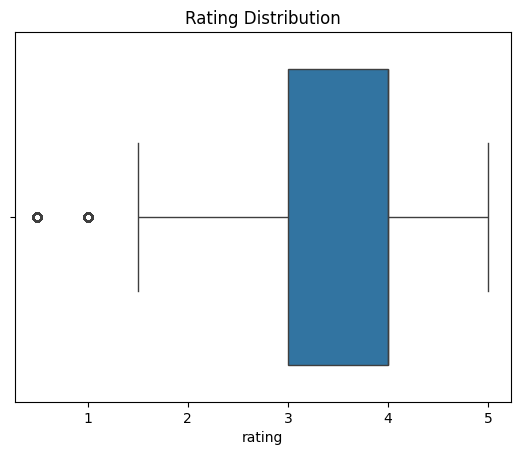

In [18]:
sns.boxplot(x=ratings['rating'])
plt.title("Rating Distribution")
plt.show()


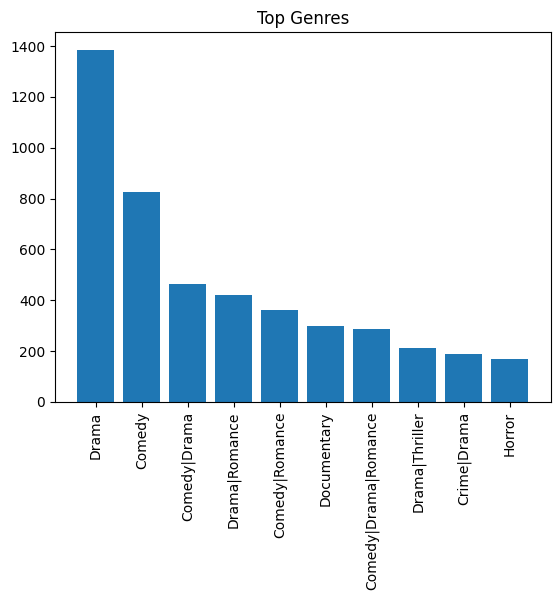

In [19]:
genre_counts = movies['genres'].value_counts().head(10)

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.title("Top Genres")
plt.show()
